In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [50]:
data=pd.read_csv(r"McDonalds Case Study-20240406T104652Z-001\McDonalds Case Study\mcdonalds.csv")

In [51]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [52]:
data.shape

(1453, 15)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [54]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [55]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [56]:
MD_x = (data.iloc[:, 0:11] == "Yes").astype(int)

In [57]:
col_means = np.round(np.mean(MD_x, axis=0), 2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [62]:
MD_pca = PCA()
MD_pca.fit(MD_x)

PCA()

In [63]:
print("Standard deviations:\n", MD_pca.explained_variance_)
print("\nRotation:\n", MD_pca.components_.T)
print("\nProportion of Variance Explained:\n", MD_pca.explained_variance_ratio_)

Standard deviations:
 [0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Rotation:
 [[-0.5  0.4 -0.3  0.1 -0.3  0.2 -0.3  0.   0.6 -0.1  0. ]
 [-0.2  0.  -0.1 -0.1  0.3 -0.3 -0.1 -0.1 -0.  -0.7 -0.5]
 [-0.   0.  -0.   0.2  0.1 -0.4  0.7  0.4  0.4 -0.1  0.1]
 [ 0.1 -0.  -0.3 -0.4 -0.1 -0.4 -0.4  0.6 -0.2 -0.   0.3]
 [ 0.3 -0.1 -0.8  0.3  0.4  0.2  0.  -0.1 -0.   0.   0. ]
 [-0.1 -0.1 -0.1 -0.1  0.1 -0.6 -0.1 -0.6  0.2  0.2  0.3]
 [-0.3 -0.6 -0.1  0.1 -0.1 -0.1 -0.   0.1  0.1  0.4 -0.5]
 [-0.5  0.3 -0.3 -0.  -0.2 -0.1  0.4 -0.1 -0.6  0.1  0. ]
 [ 0.3  0.6  0.   0.1 -0.  -0.3 -0.1  0.   0.1  0.5 -0.5]
 [-0.2  0.1  0.2  0.8  0.3 -0.2 -0.3  0.2 -0.2 -0.   0.2]
 [ 0.4 -0.1 -0.1  0.4 -0.7 -0.2 -0.  -0.2 -0.1 -0.3 -0. ]]

Proportion of Variance Explained:
 [0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]


In [64]:
explained_variance = np.around(MD_pca.explained_variance_, decimals=1)
components = np.around(MD_pca.components_.T, decimals=1)
explained_variance_ratio = np.around(MD_pca.explained_variance_ratio_, decimals=1)

In [65]:
print("Standard deviations:\n", explained_variance)
print("\nRotation:\n", components)
print("\nProportion of Variance Explained:\n", explained_variance_ratio)

Standard deviations:
 [0.6 0.4 0.3 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Rotation:
 [[-0.5  0.4 -0.3  0.1 -0.3  0.2 -0.3  0.   0.6 -0.1  0. ]
 [-0.2  0.  -0.1 -0.1  0.3 -0.3 -0.1 -0.1 -0.  -0.7 -0.5]
 [-0.   0.  -0.   0.2  0.1 -0.4  0.7  0.4  0.4 -0.1  0.1]
 [ 0.1 -0.  -0.3 -0.4 -0.1 -0.4 -0.4  0.6 -0.2 -0.   0.3]
 [ 0.3 -0.1 -0.8  0.3  0.4  0.2  0.  -0.1 -0.   0.   0. ]
 [-0.1 -0.1 -0.1 -0.1  0.1 -0.6 -0.1 -0.6  0.2  0.2  0.3]
 [-0.3 -0.6 -0.1  0.1 -0.1 -0.1 -0.   0.1  0.1  0.4 -0.5]
 [-0.5  0.3 -0.3 -0.  -0.2 -0.1  0.4 -0.1 -0.6  0.1  0. ]
 [ 0.3  0.6  0.   0.1 -0.  -0.3 -0.1  0.   0.1  0.5 -0.5]
 [-0.2  0.1  0.2  0.8  0.3 -0.2 -0.3  0.2 -0.2 -0.   0.2]
 [ 0.4 -0.1 -0.1  0.4 -0.7 -0.2 -0.  -0.2 -0.1 -0.3 -0. ]]

Proportion of Variance Explained:
 [0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]


In [66]:
MD_proj = MD_pca.transform(MD_x)

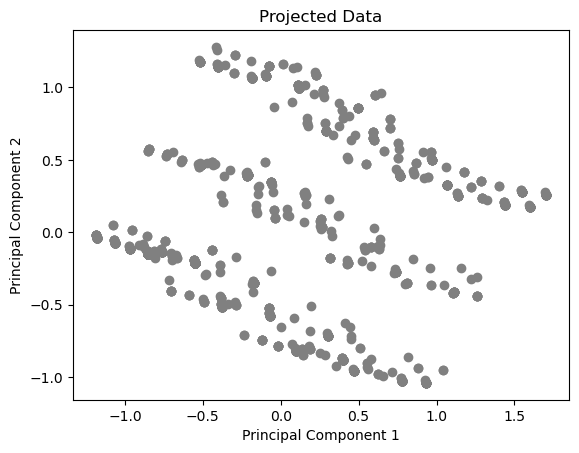

In [67]:
plt.scatter(MD_proj[:, 0], MD_proj[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data')
plt.show()

In [68]:
proj_axes = MD_pca.components_.T
print("Projection Axes:\n", proj_axes)

Projection Axes:
 [[-0.5  0.4 -0.3  0.1 -0.3  0.2 -0.3  0.   0.6 -0.1  0. ]
 [-0.2  0.  -0.1 -0.1  0.3 -0.3 -0.1 -0.1 -0.  -0.7 -0.5]
 [-0.   0.  -0.   0.2  0.1 -0.4  0.7  0.4  0.4 -0.1  0.1]
 [ 0.1 -0.  -0.3 -0.4 -0.1 -0.4 -0.4  0.6 -0.2 -0.   0.3]
 [ 0.3 -0.1 -0.8  0.3  0.4  0.2  0.  -0.1 -0.   0.   0. ]
 [-0.1 -0.1 -0.1 -0.1  0.1 -0.6 -0.1 -0.6  0.2  0.2  0.3]
 [-0.3 -0.6 -0.1  0.1 -0.1 -0.1 -0.   0.1  0.1  0.4 -0.5]
 [-0.5  0.3 -0.3 -0.  -0.2 -0.1  0.4 -0.1 -0.6  0.1  0. ]
 [ 0.3  0.6  0.   0.1 -0.  -0.3 -0.1  0.   0.1  0.5 -0.5]
 [-0.2  0.1  0.2  0.8  0.3 -0.2 -0.3  0.2 -0.2 -0.   0.2]
 [ 0.4 -0.1 -0.1  0.4 -0.7 -0.2 -0.  -0.2 -0.1 -0.3 -0. ]]
